In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle, islice

%matplotlib inline

In [266]:
MATCHES = [(2990,2906,997,3024,4915,4450),
               (4512,1425,4915,3674,6845,3218),
               (6845,4915,2928,3826,4469,3238),
               (4915,2521,6831,847,4450,2944),
               (1318,4512,6445,997,1778,4915),
               (488,1359,1425,3663,4915,6076),
               (4915,2930,2605,3223,4662,2471),
               (2930,2557,5803,4915,4125,847)]

# All matches for days 2 and 3 for portland

In [267]:
raw_data = pd.read_csv('Portland_Data.csv',header=3,index_col=3,usecols=range(3,16))
def remove_percentage(s):
    if isinstance(s, str):
        return float(s.rstrip('%'))
    else:
        return 0

# raw_data['How much defense played?'] = raw_data['How much defense played?'].apply(remove_percentage)


In [268]:
data = raw_data.groupby(['Team #'])['Scale Cubes', 'Switch Cubes', 'Opponent Switch Cubes',
                                  'Exchange Cubes'].mean()

data.fillna(value=0,axis=1,inplace=True)
print(data.index)

data['Total Cubes'] = data['Scale Cubes'] + data['Switch Cubes'] \
    + data['Opponent Switch Cubes'] + data['Exchange Cubes']

data = data.sort_values(by='Total Cubes', ascending=False)

data.loc[360]

Int64Index([ 360,  488,  492,  847,  948,  957,  997, 1318, 1359, 1425, 1510,
            1540, 1595, 1778, 1983, 2046, 2147, 2374, 2471, 2521, 2522, 2557,
            2605, 2635, 2733, 2811, 2906, 2910, 2928, 2930, 2944, 2976, 2990,
            3024, 3218, 3223, 3238, 3663, 3674, 3711, 4061, 4125, 4131, 4450,
            4469, 4488, 4495, 4512, 4513, 4662, 4911, 4915, 4980, 5450, 5468,
            5803, 5920, 6076, 6443, 6445, 6465, 6831, 6845, 7034],
           dtype='int64', name='Team #')


Scale Cubes              0.9
Switch Cubes             0.6
Opponent Switch Cubes    0.0
Exchange Cubes           2.5
Total Cubes              4.0
Name: 360, dtype: float64

In [289]:
print(data.index.values)

# Both work, top one is deprecated
#data.get_value(4915,col='# cubes on scale:')

#data.at[4915,'# cubes on scale:']
'''
for value in data.index.values:
    print(data.at[value,'# cubes on scale:'])
    '''
data.loc[3826]



[2811 4450 2976 2990 2910 4061 4911 2557 1778 4980 2046 6445 2522 2906
 2471 1510 1983 3223 2930 1425 4488  492  997 3663 2928 3218 2147 5920
 5803 1318 4512 2733  948  488 4513 3024  360 2635 3711  957 4469 5468
 4125 6076 6465 4915 3238 1540 4131 6831 4495 2605 6443 2521  847 6845
 1359 1595 7034 3674 2374 5450 2944 4662]


KeyError: 'the label [3826] is not in the [index]'

In [270]:
data.head()

,Scale Cubes,Switch Cubes,Opponent Switch Cubes,Exchange Cubes,Total Cubes
Team #,,,,,
2811,2.6,0.3,0.9,5.2,9.0
4450,0.0,1.3,0.1,6.9,8.3
2976,2.3,5.5,0.0,0.1,7.9
2990,2.0,1.3,0.8,3.2,7.3
2910,4.7,0.9,1.2,0.4,7.2


In [271]:
data.describe()

,Scale Cubes,Switch Cubes,Opponent Switch Cubes,Exchange Cubes,Total Cubes
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.801563,0.743750,0.476562,1.373437,4.395313
std,1.352657,0.830925,0.725005,1.290532,1.756297
min,0.000000,0.000000,0.000000,0.000000,1.200000
25%,0.775000,0.300000,0.000000,0.400000,3.175000
50%,1.800000,0.400000,0.300000,1.050000,4.300000
75%,2.600000,1.000000,0.625000,1.925000,5.550000
max,5.100000,5.500000,4.800000,6.900000,9.000000


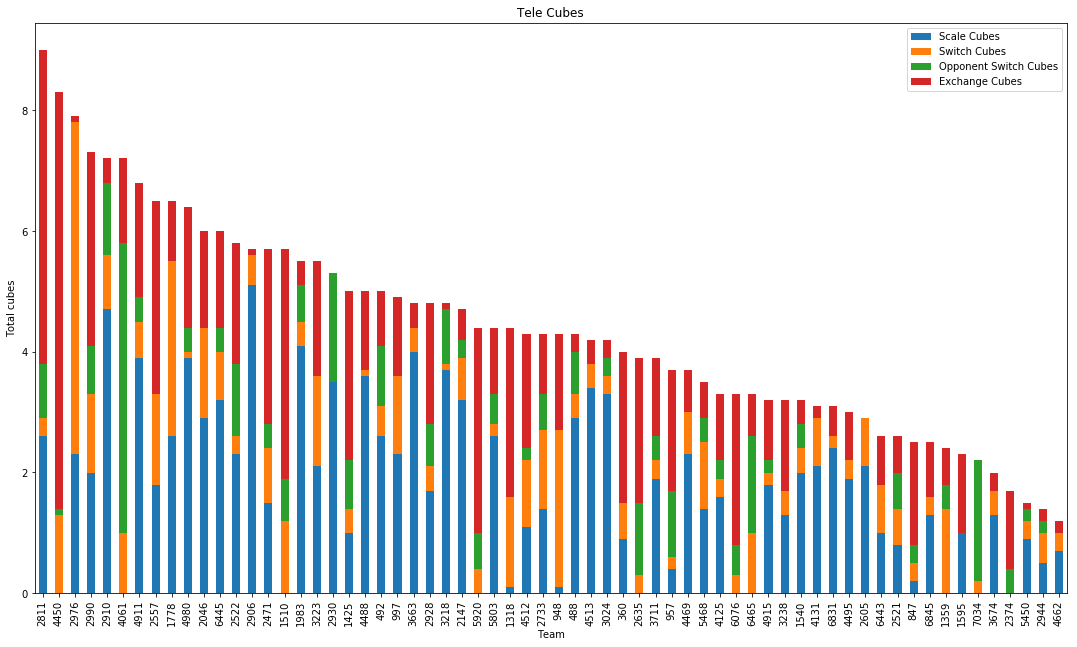

In [272]:
plot1 = data[['Scale Cubes', 'Switch Cubes', 'Opponent Switch Cubes',
              'Exchange Cubes']].plot(kind='bar', stacked=True, title='Tele Cubes',figsize=(18.5, 10.5))

plot1.set_xlabel('Team')
plot1.set_ylabel('Total cubes');

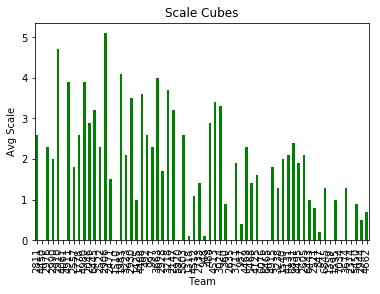

In [273]:
plot2 = data['Scale Cubes'].plot(kind='bar', stacked=True, title='Scale Cubes', color='green')
plot2.set_xlabel('Team')
plot2.set_ylabel('Avg Scale');

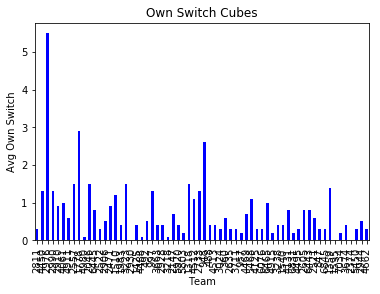

In [275]:
plot3 = data['Switch Cubes'].plot(kind='bar', stacked=True, title='Own Switch Cubes', color='blue')
plot3.set_xlabel('Team')
plot3.set_ylabel('Avg Own Switch');

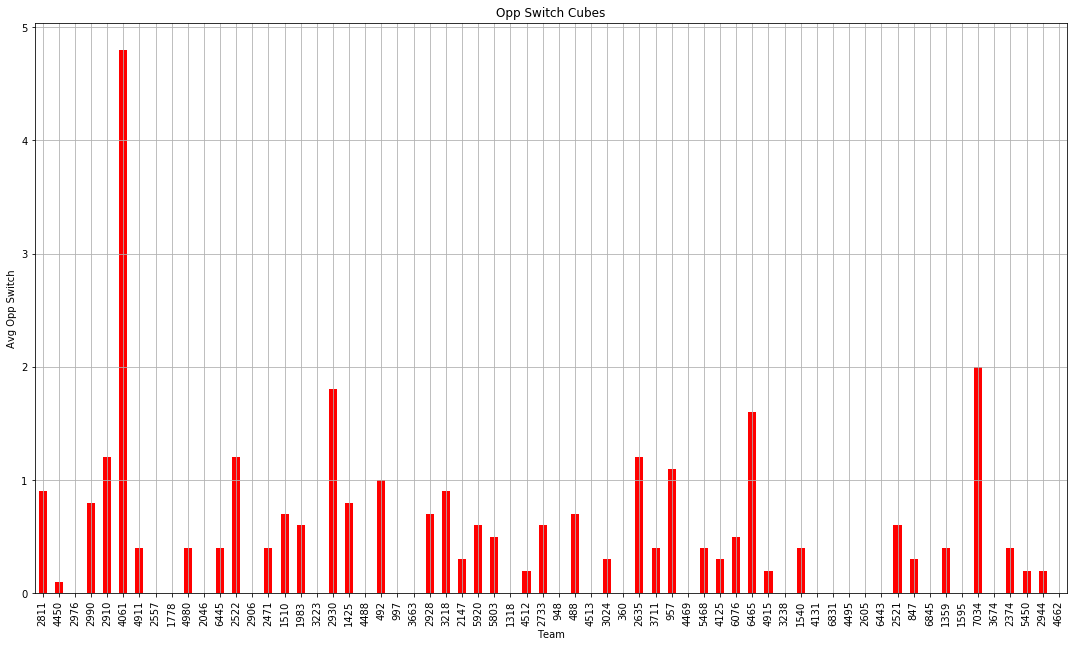

In [276]:
plot4 = data['Opponent Switch Cubes'].plot(kind='bar', stacked=True, title='Opp Switch Cubes', color='red',grid=True,figsize=(18.5, 10.5))
plot4.set_xlabel('Team')
plot4.set_ylabel('Avg Opp Switch');

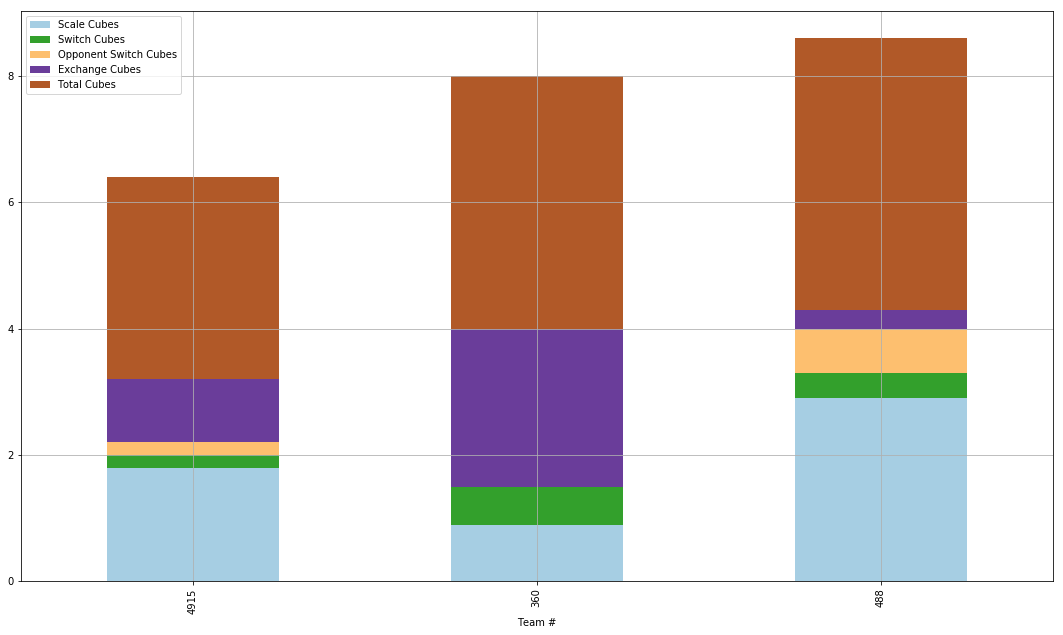

In [277]:
my_colors  = [(x/10.0, x/20.0, 0.75) for x in range(len(data))] # <-- Quick gradient example along the Red/Green dimensions.

plot5 = (data.loc[[4915,360,488]].plot(kind='bar',colormap='Paired',figsize=(18.5,10.5),grid=True,stacked=True))


/home/darwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


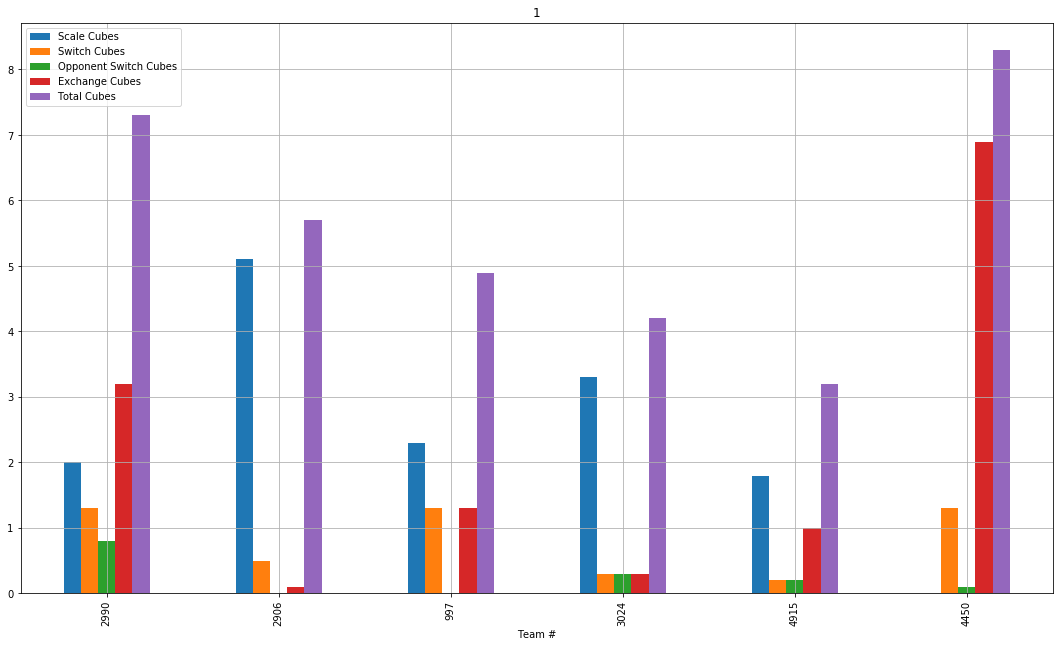

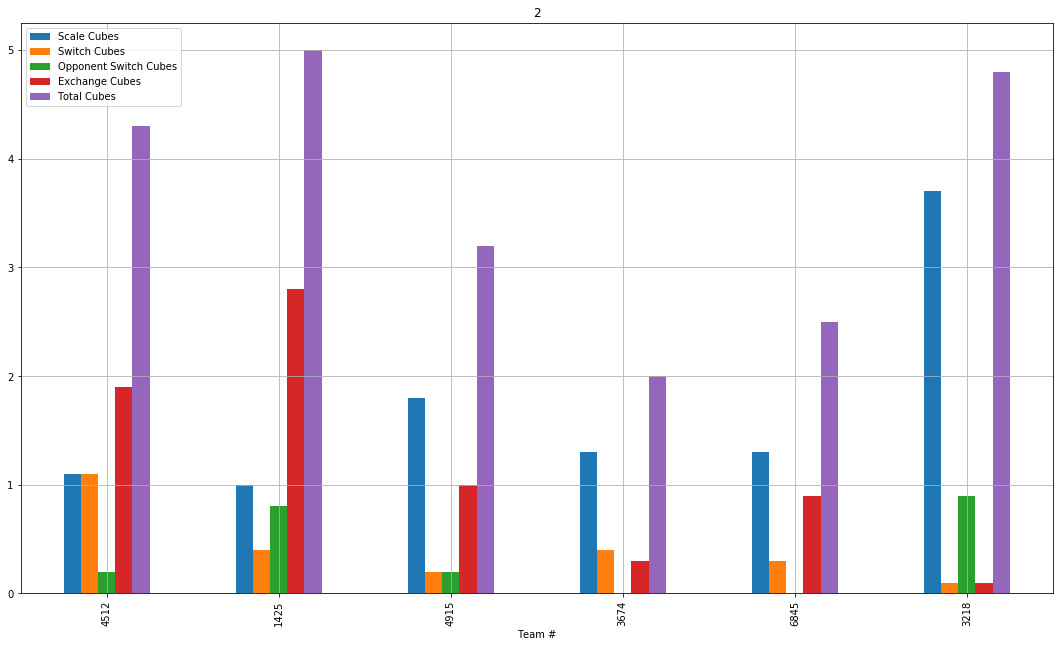

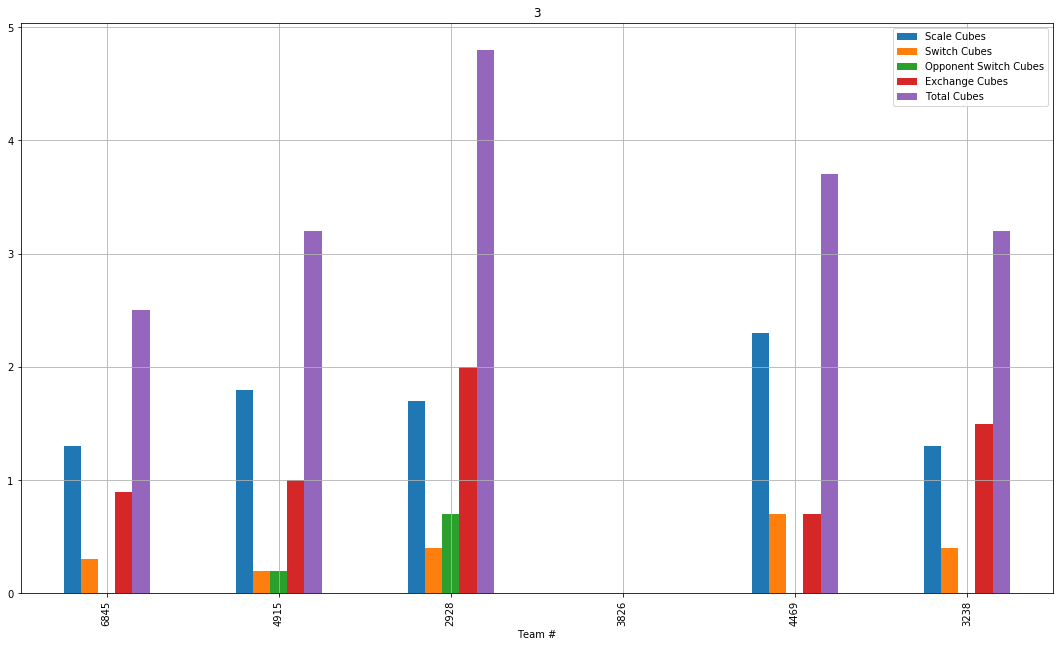

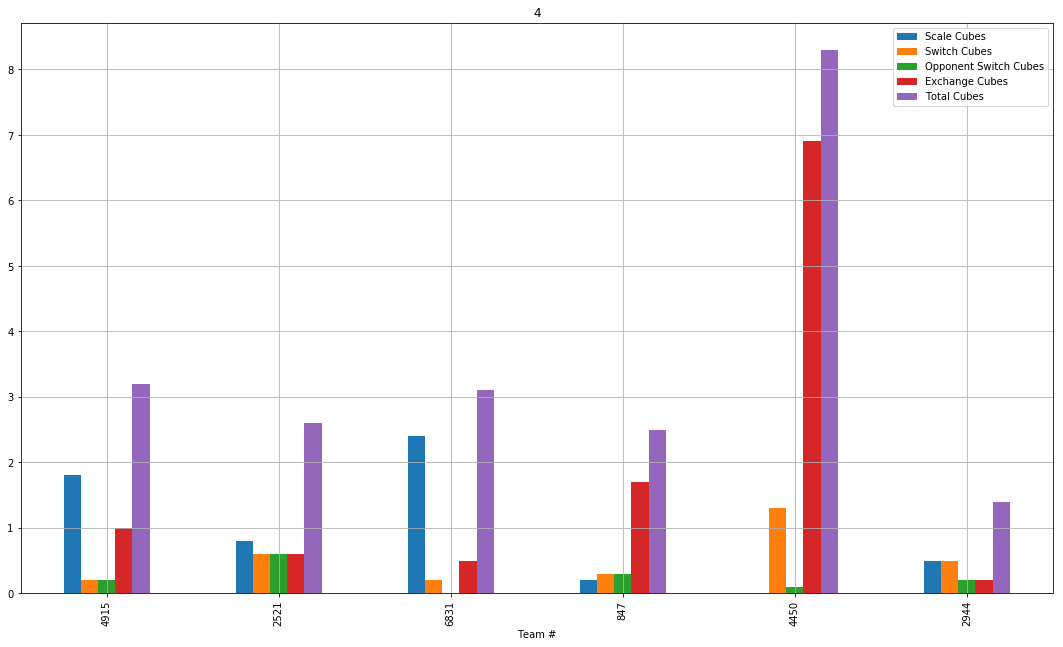

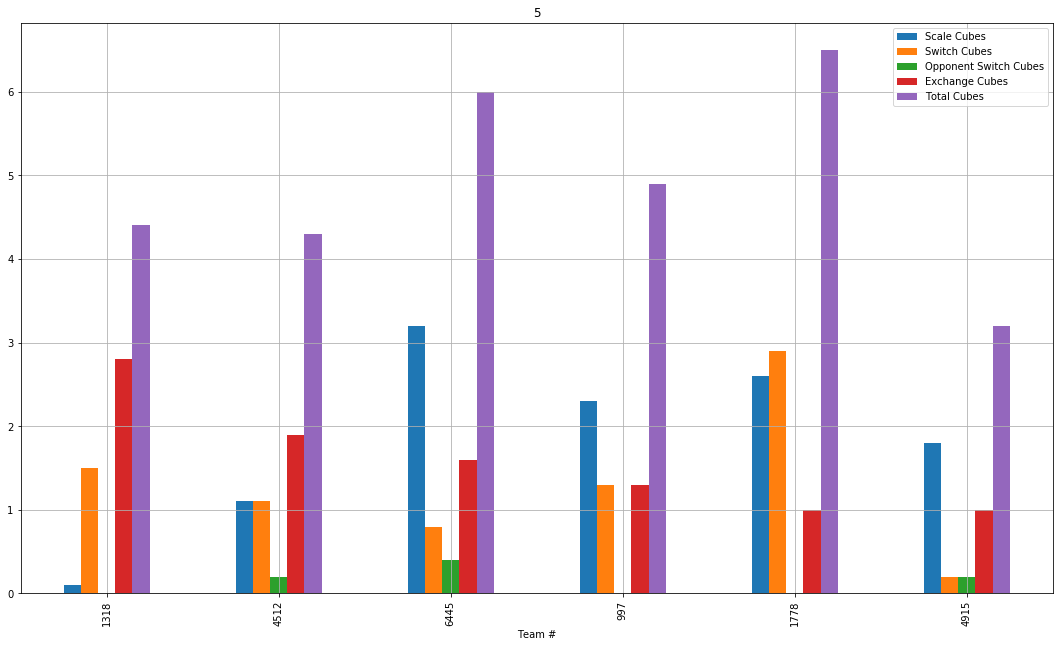

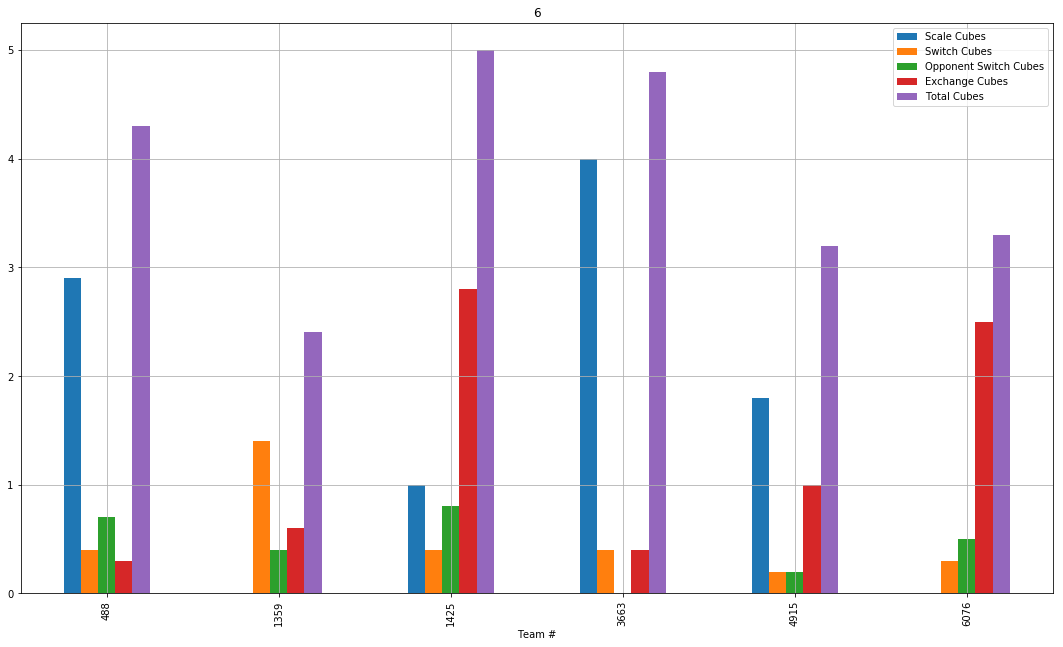

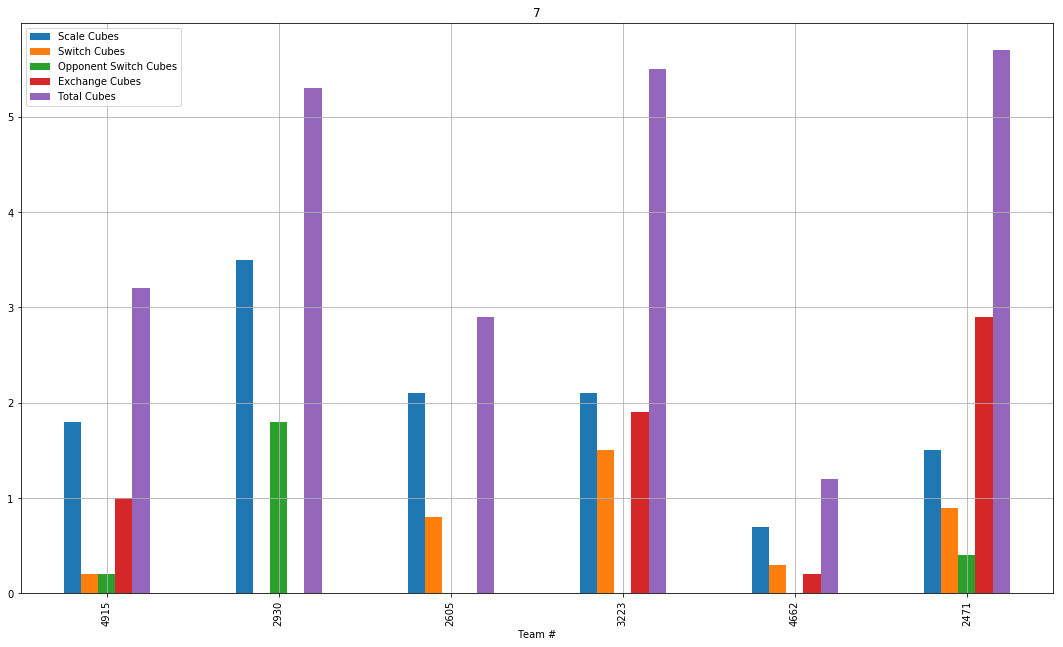

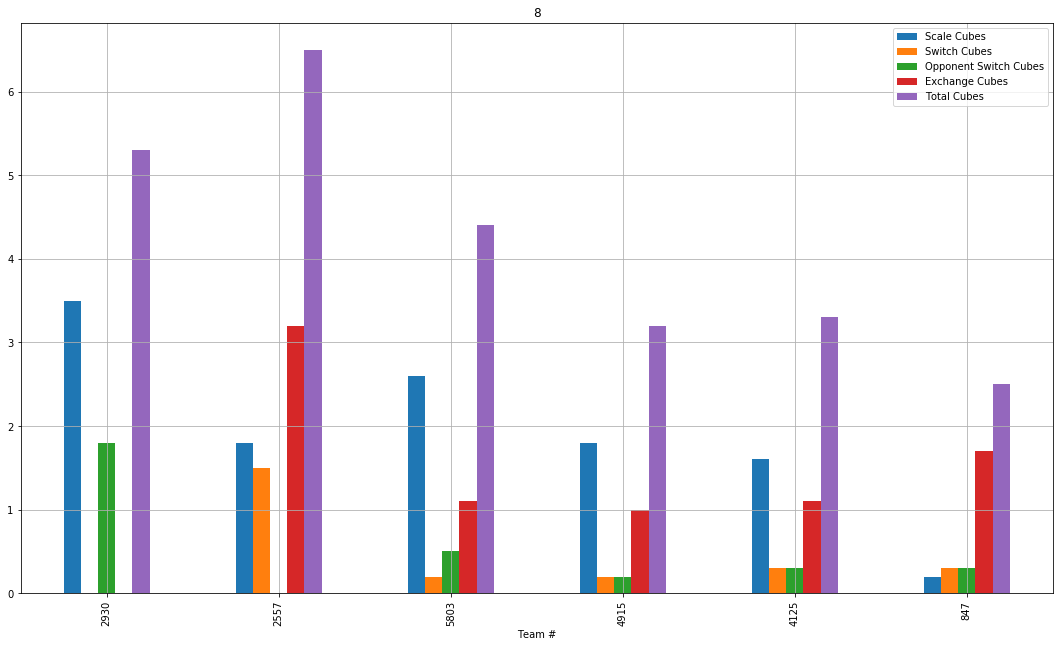

In [290]:
# pump out graphs for days 2 and 3


tup = MATCHES[0] # First match


i = 0
for match in MATCHES:
    teams = []
    i += 1
    for team in match:
        teams.append(team)

    graph = data.loc[teams].plot(kind='bar',title=str(i),figsize=(18.5,10.5),grid=True,colormap='winter')

    



    
    
